<a href="https://colab.research.google.com/github/merdogan97/Projects/blob/main/Seaborn_Project(U)_10_03_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION
1. Read datas
1. Poverty rate of each state
1. Most common 15 Name or Surname of killed people
1. High school graduation rate of the population that is older than 25 in states
1. Percentage of state's population according to races that are black,white,native american, asian and hispanic
1. High school graduation rate vs Poverty rate of each state
1. Kill properties
    * Manner of death
    * Kill weapon
    * Age of killed people
    * Race of killed people
    * Most dangerous cities
    * Most dangerous states
    * Having mental ilness or not for killed people
    * Threat types
    * Flee types
    * Having body cameras or not for police
1. Race rates according to states in kill data 
1. Kill numbers from states in kill data
1. Plotly Visualization Tutorial: https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners
<br>
<br>
Plot Contents:
* [Bar Plot](#1)
* [Point Plot](#2)
* [Joint Plot](#3)
* [Pie Chart](#4)
* [Lm Plot](#5)
* [Kde Plot](#6)
* [Violin Plot](#7)
* [Heatmap](#8)
* [Box Plot](#9)
* [Swarm Plot](#10)
* [Pair Plot](#11)
* [Count Plot](#12)
    


In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline


import warnings
warnings.filterwarnings('ignore') 

from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [ ]:
# Read datas
median_house_hold_in_come = pd.read_csv('/content/MedianHouseholdIncome2015.csv', encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv('/content/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('/content/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('/content/ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('/content/PoliceKillingsUS.csv', encoding="windows-1252")

In [ ]:
percentage_people_below_poverty_level = pd.read_csv('/content/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")

In [ ]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [ ]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [ ]:
percentage_people_below_poverty_level.describe()

,Geographic Area,City,poverty_rate
count,29329,29329,29329
unique,51,24255,771
top,PA,Franklin city,0
freq,1762,16,1464


# **Hepsi non-null ama içinde anlamsız birşey varmı? ona da bakmak gerekir.**

In [ ]:
percentage_people_below_poverty_level.poverty_rate.value_counts()

0       1464
-        201
7.4      129
6.7      129
10.9     128
        ... 
73.5       1
92         1
73.8       1
55.9       1
83.6       1
Name: poverty_rate, Length: 771, dtype: int64

# **burada  '-' ile ilgili 201 adet veri var. Ne anlama geldiğini bilmiyoruz. Ben bunu görmezden gelirim veya 0'a eşitlerim.**

In [ ]:
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)

In [ ]:
percentage_people_below_poverty_level.poverty_rate.value_counts()

0       1464
0.0      201
7.4      129
6.7      129
10.9     128
        ... 
73.5       1
92         1
73.8       1
55.9       1
83.6       1
Name: poverty_rate, Length: 771, dtype: int64

# **poverty_rate       29329 non-null object**

# **Burada poverty_rate sayısal bir olmasına rağmen object diyor. Ben bunu integer veya float çevirmem gerekir.**

In [ ]:
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)

In [ ]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


# **1. Poverty rate of each state**

<a id="1"></a> 
# **Bar Plot**

In [ ]:
percentage_people_below_poverty_level.sample(5)

,Geographic Area,City,poverty_rate
27745,WA,Parkland CDP,17.8
1576,AR,Gilbert town,0.0
25817,TX,Ranchitos East CDP,65.7
4050,CT,Willimantic CDP,28.2
27384,WA,Bucoda town,45.8


In [ ]:
percentage_people_below_poverty_level['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

Text(0.5, 1.0, 'Poverty Rate Given States')

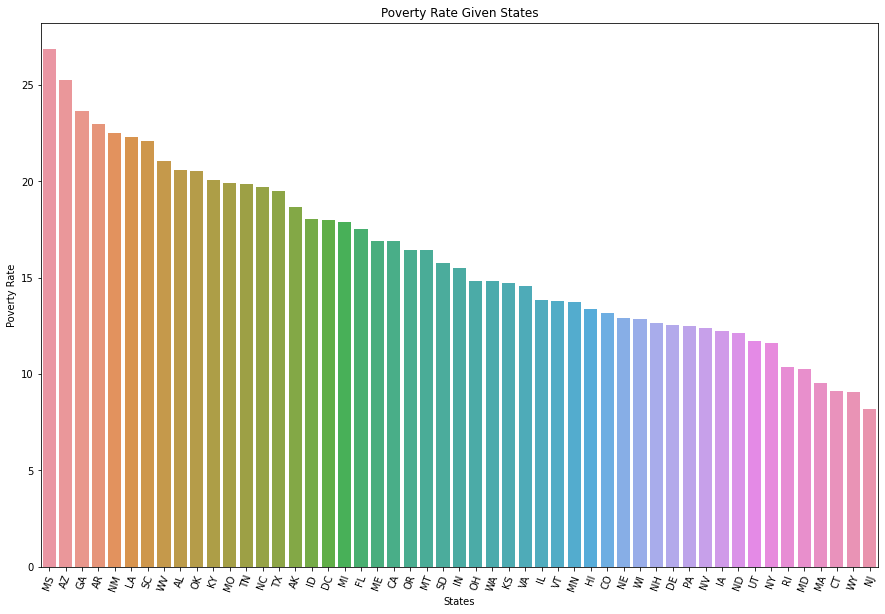

In [ ]:
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())


area_poverty_ratio = []

for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)

data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values      # True olsaydı artan şekilde olurdu
sorted_data = data.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio'])
plt.xticks(rotation= 70)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')

#  **2. Most common 15 Name or Surname of killed people**

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
kill.name.value_counts()

TK TK              49
Michael Johnson     2
Brandon Jones       2
Eric Harris         2
Michael Brown       2
                   ..
Jack Yantis         1
James Covington     1
Jeremy Mardis       1
Joseph Tyndall      1
Dwayne Jeune        1
Name: name, Length: 2481, dtype: int64

# **TK TK ???**

# Sorunlu data var demektir. Ne olduğunu bilmiyoruz. 

In [ ]:
# kill.name.value_counts()
["ali", "haydar"]

['ali', 'haydar']

In [ ]:
separate = kill.name[kill.name != 'TK TK'].str.split()            # tüm isim soyisimleri birbirinden ayırıyoruz

In [ ]:
a,b = zip(*separate)    

In [ ]:
name_list = a+b    

In [ ]:
name_count = Counter(name_list)          # isimleri saydırıyoruz
name_count

Counter({'Tim': 3,
         'Lewis': 5,
         'John': 42,
         'Matthew': 24,
         'Michael': 91,
         'Kenneth': 19,
         'Brock': 1,
         'Autumn': 1,
         'Leslie': 3,
         'Patrick': 13,
         'Ron': 2,
         'Hashim': 1,
         'Nicholas': 13,
         'Omarr': 1,
         'Loren': 3,
         'James': 56,
         'Artago': 1,
         'Thomas': 26,
         'Jimmy': 5,
         'Andy': 1,
         'Tommy': 3,
         'Brian': 12,
         'Salvador': 4,
         'Richard': 36,
         'Marcus': 5,
         'Mario': 8,
         'Talbot': 1,
         'Robert': 48,
         'Jeffrey': 18,
         'Donte': 3,
         'Kavonda': 1,
         'Quincy': 2,
         'Jose': 28,
         'Nathan': 6,
         'Scott': 23,
         'Zaki': 1,
         'Terence': 3,
         'Pablo': 3,
         'Daniel': 46,
         'Jonathan': 13,
         'Carter': 2,
         'Paul': 19,
         'Dewayne': 3,
         'Todd': 9,
         'Miguel': 10,
       

In [ ]:
most_common_names = name_count.most_common(15)

In [ ]:
x,y = zip(*most_common_names)
x,y = list(x),list(y)

Text(0.5, 1.0, 'Most common 15 Name or Surname of killed people')

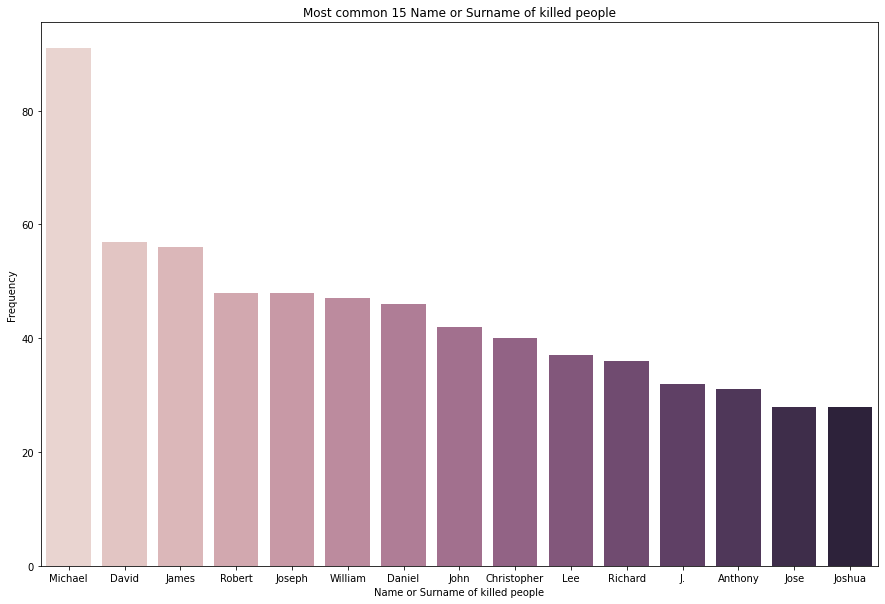

In [ ]:
# Visuliation:

plt.figure(figsize=(15,10))
ax= sns.barplot(x=x, y=y,palette = sns.cubehelix_palette(len(x)))     # len(x) ile aynı renk ama tonlarında çizdiriyor.
plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of killed people')

# **3. High school graduation rate of the population that is older than 25 in states**
# Percentage of Given State's Population Above 25 that Has Graduated High School

In [ ]:
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [ ]:
percent_over_25_completed_highSchool.percent_completed_hs.value_counts()

100     1301
-        197
91.7     170
92.9     169
92.5     168
        ... 
39.3       1
20.1       1
27.2       1
36.8       1
43.9       1
Name: percent_completed_hs, Length: 728, dtype: int64

# **197 adet '-' var. Cevabını bilmediğim bir oran var ve bunu sıfır(0) 'a çevirelim.**

In [ ]:
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace = True)

In [ ]:
percent_over_25_completed_highSchool.percent_completed_hs.value_counts()

100     1301
0.0      197
91.7     170
92.9     169
92.5     168
        ... 
39.3       1
20.1       1
27.2       1
36.8       1
43.9       1
Name: percent_completed_hs, Length: 728, dtype: int64

In [ ]:
percent_over_25_completed_highSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


# **İnfo ile inceleme yaptığımızda "percent_completed_hs" 'in object/string olduğunu görüyoruz bunun float'a çevirmemiz gerekiyor.**

In [ ]:
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)

In [ ]:
percent_over_25_completed_highSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29329 non-null  object 
 1   City                  29329 non-null  object 
 2   percent_completed_hs  29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


# **Eyaletlerimi unique olarak filtrele diyelim**

In [ ]:
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highschool = []
for i in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)

In [ ]:
# depoladığım datamı(eyaletlerin listesi ve lise oranı) sort edelim: 
data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})
data


,area_list,area_highschool_ratio
0,AL,80.163419
1,AK,80.098028
2,AZ,79.218182
3,AR,79.949538
4,CA,80.824639
5,CO,88.926201
6,CT,91.591667
7,DE,88.519481
8,DC,89.300000
9,FL,85.457625


In [ ]:
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values  # sıralamanın yeni indexini buldum
new_index

array([43, 24, 10, 31, 18,  2,  3,  1,  0, 40,  4, 42, 48, 17, 36, 25, 33,
       50, 12, 46,  9, 41, 14, 28, 47, 34, 37, 16, 20, 35, 13,  7, 39,  5,
       38, 22,  8, 23, 27, 44, 15, 45, 26, 49, 30, 32, 29, 19,  6, 11, 21])

In [ ]:
sorted_data2 = data.reindex(new_index)   # artan bir sıraya göre sıraladı
sorted_data2

,area_list,area_highschool_ratio
43,TX,74.086949
24,MS,78.470718
10,GA,78.634450
31,NM,78.971783
18,LA,79.122363
2,AZ,79.218182
3,AR,79.949538
1,AK,80.098028
0,AL,80.163419
40,SC,80.645707


Text(0.5, 1.0, "Percentage of Given State's Population Above 25 that Has Graduated High School")

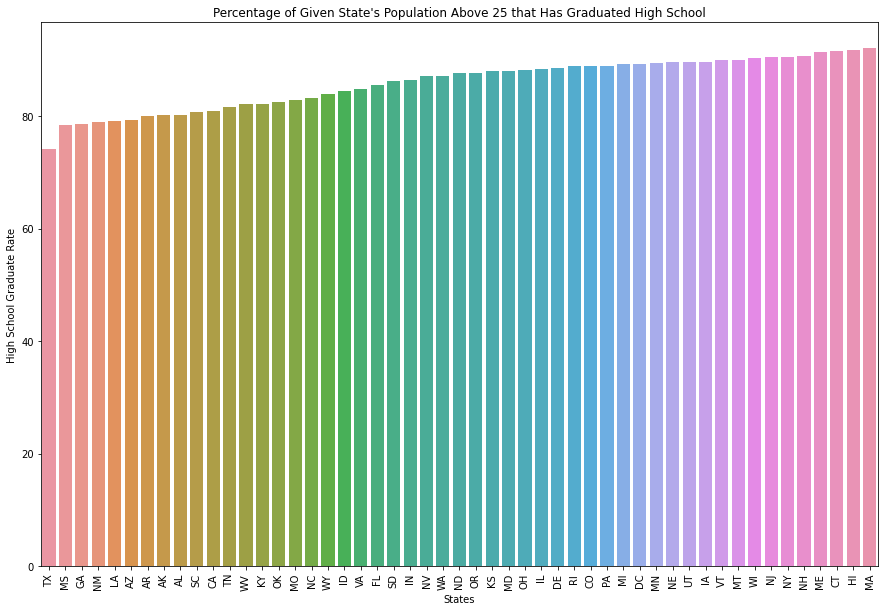

In [ ]:
# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2['area_list'], y=sorted_data2['area_highschool_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('High School Graduate Rate')
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")

# **4. Percentage of state's population according to races that are black,white,native american, asian and hispanic**

In [ ]:
share_race_city.sample(10)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
2350,CA,Elkhorn CDP,71.7,0.6,0.4,4,37.6
1444,AR,Bradley city,42.8,56.7,0.2,0.2,1.4
1426,AR,Bethel Heights city,61.6,1.9,1.4,3,34.7
14399,MO,Portageville city,78.6,19,0.1,0.2,0.9
12414,MN,Beaulieu CDP,54.2,0,25,0,6.3
10996,MD,Charlestown town,94.8,3.7,0.2,0.1,2.5
17528,NY,New Square village,99.2,0.1,0,0.1,0.4
16326,NJ,Upper Stewartsville CDP,97.2,0.9,1.4,0,2.4
9941,KY,Ferguson city,96.5,0.8,0.4,0.9,1.5
18846,ND,Dunn Center city,93.8,0,1.4,0,1.4


In [ ]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [ ]:
share_race_city.head(10)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
5,AL,Alabaster city,79.4,13.5,0.4,0.9,9
6,AL,Albertville city,75.9,1.9,0.8,0.5,27.9
7,AL,Alexander City city,62.2,32,0.2,0.9,4.8
8,AL,Alexandria CDP,87.4,10.2,0.3,0.5,0.9
9,AL,Aliceville city,22.6,74.9,0.1,0,1.2


# **Info'ya baktığımızda:**

# 2   share_white            29268 non-null  object

# 3   share_black            29268 non-null  object

# 4   share_native_american  29268 non-null  object

# 5   share_asian            29268 non-null  object

# 6   share_hispanic         29268 non-null  object

# **Bunlar oran olduğu için hepsinin floatA çevirmem gerekiyor**


In [ ]:
# '-' ile 'x' ile dolu olan değerlerin ne anlama geldiğini bilmiyoruz ve bunları 0 ile dolduralım.
share_race_city.replace(['-'],0.0,inplace = True)
share_race_city.replace(['(X)'],0.0,inplace = True)

In [ ]:
# object değerleri  de float çevirelim:
share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)

In [ ]:
# eyaletimden unique olanları buluyorum
area_list = list(share_race_city['Geographic area'].unique())
area_list

In [ ]:
# Eyaletlere göre ırkların oranlarını boş listere dolduruyorum(Tablodaki yüzdeler city'lere göre)
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
for i in area_list:
    x = share_race_city[share_race_city['Geographic area']==i]
    share_white.append(sum(x.share_white) / len(x))
    share_black.append(sum(x.share_black) / len(x))
    share_native_american.append(sum(x.share_native_american) / len(x))
    share_asian.append(sum(x.share_asian) / len(x))
    share_hispanic.append(sum(x.share_hispanic) / len(x))

[Text(0, 0.5, 'States'),
 Text(0.5, 0, 'Percentage of Races'),
 Text(0.5, 1.0, "Percentage of State's Population According to Races ")]

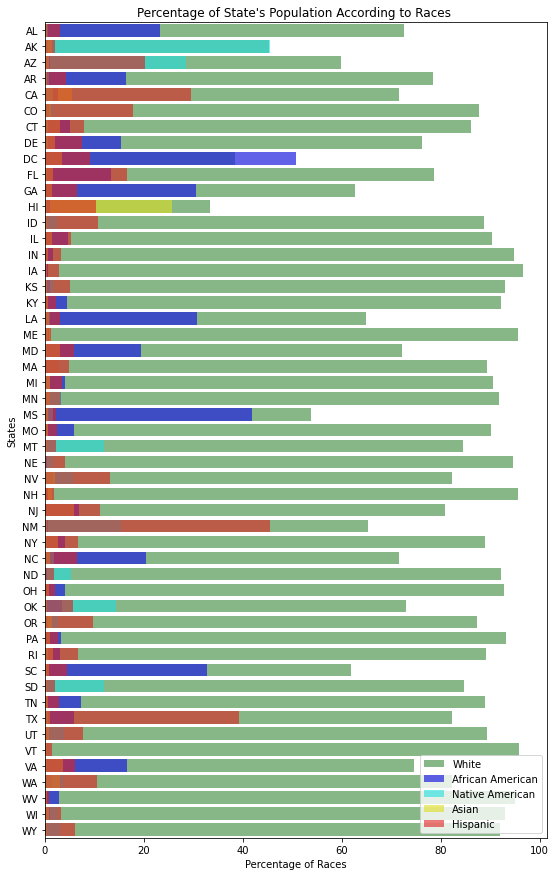

In [ ]:
# visualization
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white,y=area_list,color='green',alpha = 0.5,label='White' )
sns.barplot(x=share_black,y=area_list,color='blue',alpha = 0.7,label='African American')
sns.barplot(x=share_native_american,y=area_list,color='cyan',alpha = 0.6,label='Native American')
sns.barplot(x=share_asian,y=area_list,color='yellow',alpha = 0.6,label='Asian')
sns.barplot(x=share_hispanic,y=area_list,color='red',alpha = 0.6,label='Hispanic')

ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ")

<a id="2"></a>
# **Point Plot**

# **high school graduation rate vs Poverty rate of each state**

In [ ]:
sorted_data.head()

,area_list,area_poverty_ratio
24,MS,1.000000
2,AZ,0.939884
10,GA,0.880204
3,AR,0.854151
31,NM,0.837207


In [ ]:
sorted_data2.head()

,area_list,area_highschool_ratio
43,TX,0.805044
24,MS,0.852679
10,GA,0.854458
31,NM,0.858124
18,LA,0.859760


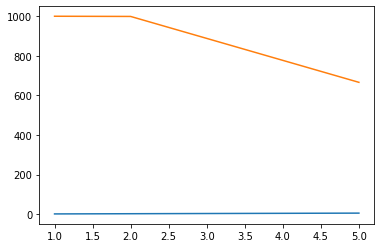

In [ ]:
x = [1,2,3,4,5]
y1 = [1,2,3,4,5]
y2= [1000, 999, 888, 777, 666]
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

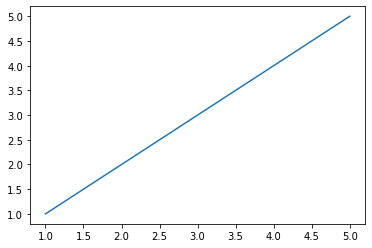

In [ ]:
plt.plot(x,y1)

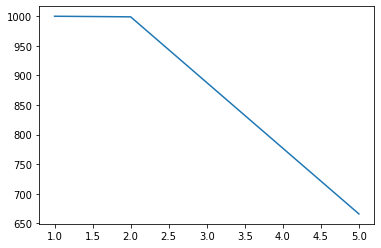

In [ ]:
plt.plot(x,y2)
plt.show()

# Görüldüğü gibi aradaki oranlar çok farklı olduğu için grafik anlamsız çıkıyor.

# Ayrı ayrı plot ettirince çıkan grafik ile 2'si aynı aynı grafikte gösterilnce grafik anlamsızlaşıyor.

# **Ne yapmalıyız?**
# **Normalize edip aynı scale düşürmeliyiz.**

In [ ]:
#   0 < [1,2,3,4,5] / 5 < 1   en büyük sayıya 5'e  bölersek 0-1 arasında normalize etmiş olurum
#   0 < [1000,9000,800,700,600]/ 1000  < 1  en büyük sayıya 1000'e  bölersek 0-1 arasında normalize etmiş olurum

In [ ]:
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio']/max( sorted_data['area_poverty_ratio'])
sorted_data

,area_list,area_poverty_ratio
24,MS,1.000000
2,AZ,0.939884
10,GA,0.880204
3,AR,0.854151
31,NM,0.837207
18,LA,0.829176
40,SC,0.822249
48,WV,0.784185
0,AL,0.766687
36,OK,0.764235


In [ ]:
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio']/max( sorted_data2['area_highschool_ratio'])
sorted_data2

,area_list,area_highschool_ratio
43,TX,0.805044
24,MS,0.852679
10,GA,0.854458
31,NM,0.858124
18,LA,0.859760
2,AZ,0.860801
3,AR,0.868748
1,AK,0.870362
0,AL,0.871072
40,SC,0.876313


In [ ]:
# Bu 2 datayı concat ile birleştirelim
data = pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1)
data

,area_list,area_poverty_ratio,area_highschool_ratio
0,AL,0.766687,0.871072
1,AK,0.694778,0.870362
2,AZ,0.939884,0.860801
3,AR,0.854151,0.868748
4,CA,0.628188,0.878257
5,CO,0.490539,0.966290
6,CT,0.339883,0.995254
7,DE,0.467033,0.961871
8,DC,0.669537,0.970352
9,FL,0.651259,0.928600


In [ ]:
data.sort_values('area_poverty_ratio',inplace=True)

In [ ]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


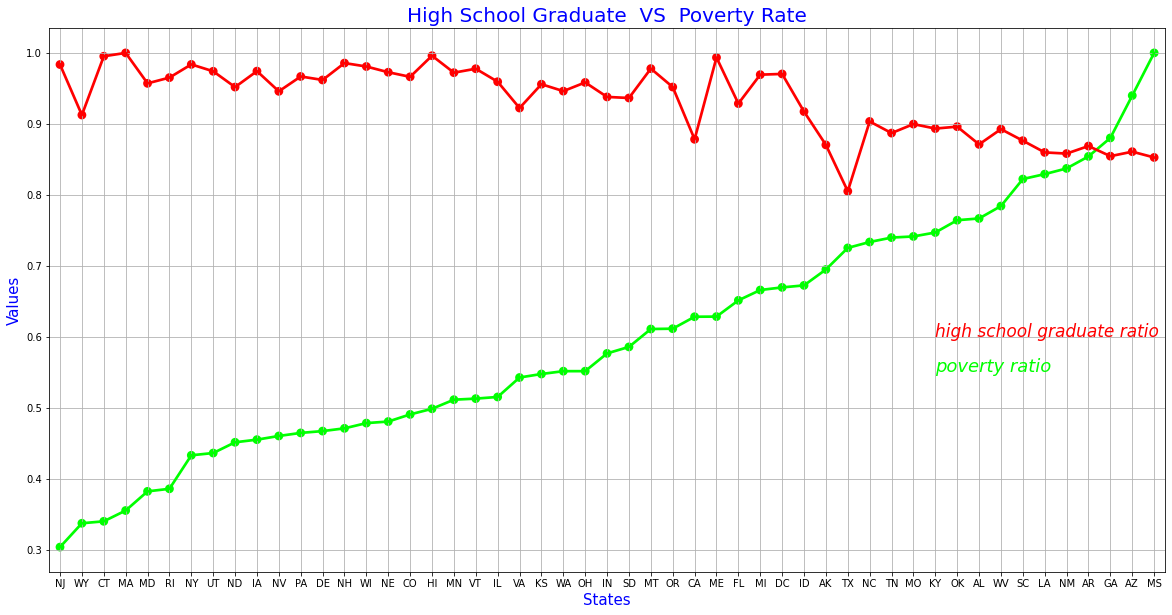

In [ ]:
# visualization:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='area_list',y='area_poverty_ratio',data=data,color='lime',alpha=0.8)
sns.pointplot(x='area_list',y='area_highschool_ratio',data=data,color='red',alpha=0.8)

# seaborn data içindeki columnları biliyor o nedenle yazmıyoruz..
# plot üzerine yazı yazdırabiliyoruz:

plt.text(40,0.6,'high school graduate ratio',color='red',fontsize = 17,style = 'italic')
plt.text(40,0.55,'poverty ratio',color='lime',fontsize = 18,style = 'italic')

plt.xlabel('States',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('High School Graduate  VS  Poverty Rate',fontsize = 20,color='blue')
plt.grid()


<a id="3"></a> 
# **Joint Plot**

In [ ]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


In [ ]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# joint kernel density
# pearsonr= if it is 1, there is positive correlation and if it is, -1 there is negative correlation.
# If it is zero, there is no correlation between variables


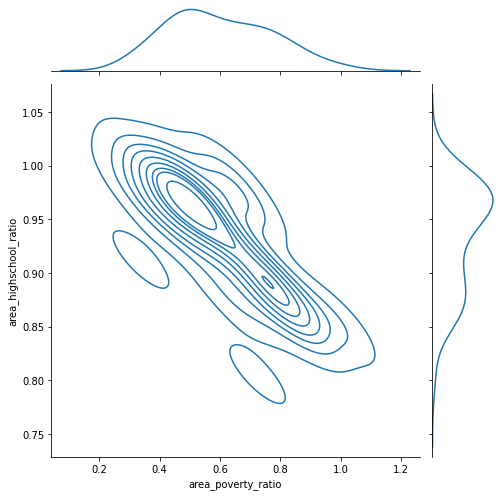

In [ ]:
# Show the joint distribution using kernel density estimation ==>  KDE
g = sns.jointplot(data.area_poverty_ratio, data.area_highschool_ratio, kind="kde", size=7)
plt.savefig('graph.png')
plt.show()

In [ ]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


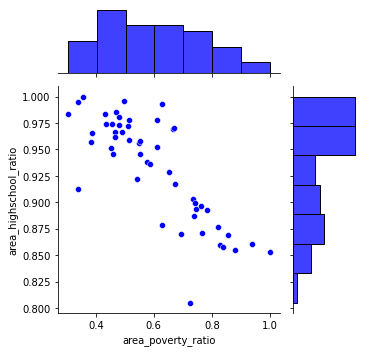

In [ ]:
# you can change parameters of joint plot
# kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }
# Different usage of parameters but same plot with previous one
g = sns.jointplot("area_poverty_ratio", "area_highschool_ratio", data=data,size=5, ratio=3, color="b")

<a id="4"></a> 
# **Pie Chart**

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
kill.race.head(15)

0     A
1     W
2     H
3     W
4     H
5     W
6     H
7     W
8     W
9     B
10    W
11    B
12    B
13    W
14    B
Name: race, dtype: object

In [ ]:
kill.race.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2530     True
2531     True
2532     True
2533    False
2534    False
Name: race, Length: 2535, dtype: bool

In [ ]:
kill.race.isnull().sum()

195

In [ ]:
kill.race.dropna(inplace = True)

In [ ]:
kill.race.isnull().sum()

195

In [ ]:
kill.race.value_counts()      # 0: other

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Text(0.5, 1.0, 'Killed People According to Races')

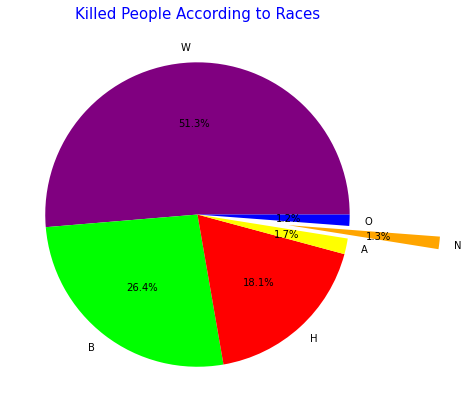

In [ ]:
# Race rates according in kill data :

labels = kill.race.value_counts().index
colors = ['purple','lime','red','yellow','orange','blue']
explode = [0,0,0,0,0.6,0]
sizes = kill.race.value_counts().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Killed People According to Races', color = 'blue',fontsize = 15)

<a id="5"></a> 
# **Lm Plot**

In [ ]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


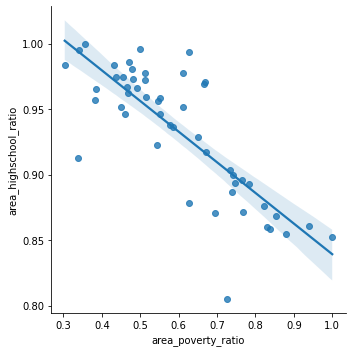

In [ ]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# lmplot 
# Show the results of a linear regression within each dataset
sns.lmplot(x="area_poverty_ratio", y="area_highschool_ratio", data=data)
plt.show()

<a id="6"></a> 
# **Kde Plot**

In [ ]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


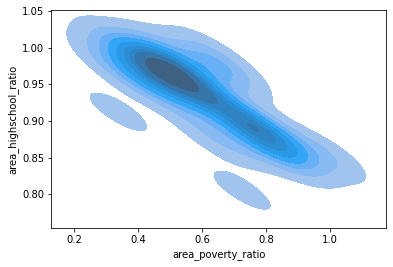

In [ ]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# cubehelix plot
sns.kdeplot(data.area_poverty_ratio, data.area_highschool_ratio, shade=True, cut=2)
plt.show()

<a id="7"></a> 
# **Violin Plot**

In [ ]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


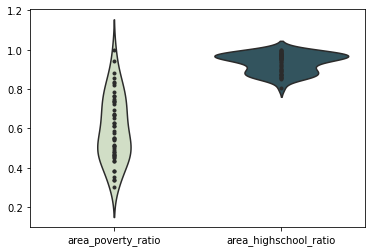

In [ ]:
# Show each distribution with both violins and points
# Use cubehelix to get a custom sequential palette

pal = sns.cubehelix_palette(2, rot=-.5, dark=.3) # pal renk veriyor
sns.violinplot(data=data, palette=pal, inner="points") # inner points noktaları veriyor.
plt.show()

<a id="8"></a> 
# **Heatmap**

In [ ]:
# correlation map
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code

In [ ]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
area_poverty_ratio,51.0,0.599625,0.168626,0.303558,0.468967,0.576540,0.736635,1.0
area_highschool_ratio,51.0,0.932880,0.048958,0.805044,0.892981,0.951839,0.972460,1.0


In [ ]:
data.corr()            # negatif korelasyon var

,area_poverty_ratio,area_highschool_ratio
area_poverty_ratio,1.000000,-0.805761
area_highschool_ratio,-0.805761,1.000000


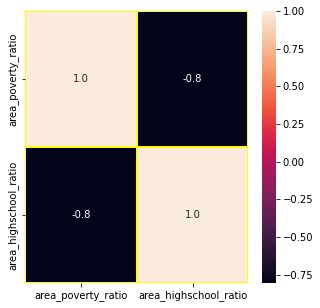

In [ ]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data.corr(), annot=True, linewidths=1, linecolor="yellow", fmt= '.1f',ax=ax) # ax : benim burada oluşturdduğum plotum içine bunun koyacağım demek
plt.show()

<a id="9"></a> 
# **Box Plot**

In [ ]:
# manner of death(olum sekli)'e göre sınıflandırmak istiyorum : ates edilerek, ateş edilerek ve sok tabancasiyla
# gender   cinsiyet öğrenmek istiyorum
# age: yas
# Plot the orbital period with horizontal boxes

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

In [ ]:
# manner of death(olum sekli) : ates edilerek, ates edilerek ve sok tabancasiyla
# gender cinsiyet
# age: yas
# Plot the orbital period with horizontal boxes

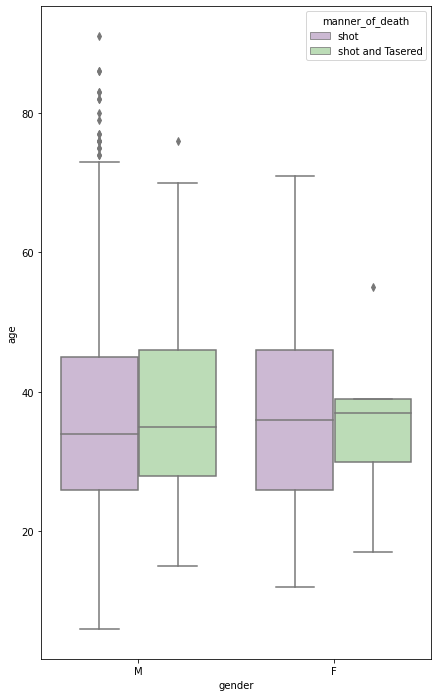

In [ ]:
plt.figure(figsize = (7,12))
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=kill, palette="PRGn")
plt.show()

<a id="10"></a> 
# **Swarm Plot**

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
# swarm plot
# manner of death(olum sekli) : ates edilerek, ates edilerek ve sok tabancasiyla
# gender cinsiyet
# age: yas

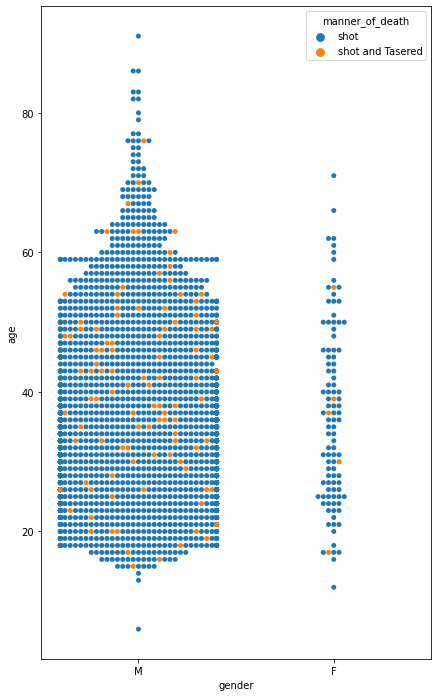

In [ ]:
plt.figure(figsize = (7,12))
sns.swarmplot(x="gender", y="age",hue="manner_of_death", data=kill)
plt.show()

<a id="11"></a> 
# **Pair Plot**

In [ ]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


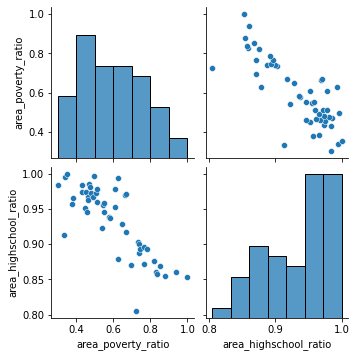

In [ ]:
# pair plot
sns.pairplot(data)
plt.show()

<a id="12"></a> 
# **Count Plot**

In [ ]:
kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


Text(0.5, 1.0, 'gender')

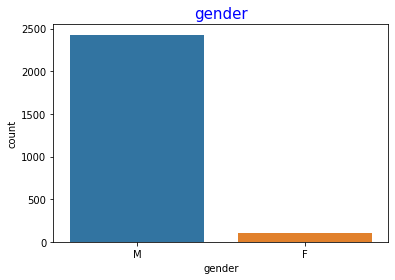

In [ ]:
# kill properties
# Manner of death
sns.countplot(kill.gender)
#sns.countplot(kill.manner_of_death)
plt.title("gender",color = 'blue',fontsize=15)

Text(0.5, 1.0, 'manner_of_death')

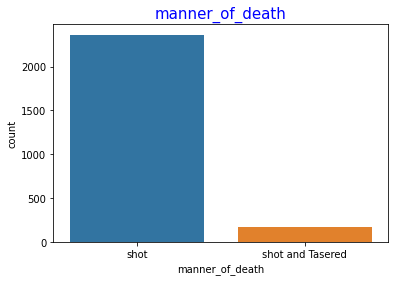

In [ ]:
sns.countplot(kill.manner_of_death)
plt.title("manner_of_death", color = 'blue',fontsize=15)

# **Kill weapon**

In [ ]:
armed = kill.armed.value_counts()
armed

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
                ... 
hand torch         1
garden tool        1
pole               1
pick-axe           1
pen                1
Name: armed, Length: 68, dtype: int64

Text(0.5, 1.0, 'Kill weapon')

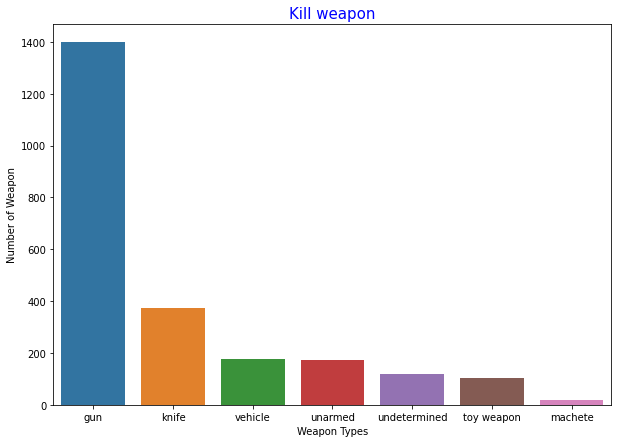

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x=armed[:7].index, y=armed[:7].values)

plt.ylabel('Number of Weapon')
plt.xlabel('Weapon Types')
plt.title('Kill weapon',color = 'blue',fontsize=15)

# **Age of killed people**

In [ ]:
kill.sample(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2085,2331,Carlos Keith Blackman,10/02/17,shot,gun,25.0,M,B,Greensboro,NC,False,attack,Other,True
55,341,Wendell King,24/01/15,shot,gun,40.0,M,W,Fort Worth,TX,False,attack,Not fleeing,False
2036,2707,Bradley Joseph Szacaks,28/01/17,shot,gun,45.0,M,W,Apache Junction,AZ,False,attack,Not fleeing,False


In [ ]:
above25 =['above25' if i >= 25 else 'below25' for i in kill.age]
df = pd.DataFrame({'age':above25})
df

,age
0,above25
1,above25
2,below25
3,above25
4,above25
...,...
2530,above25
2531,below25
2532,above25
2533,above25


Text(0.5, 1.0, 'Age of killed people')

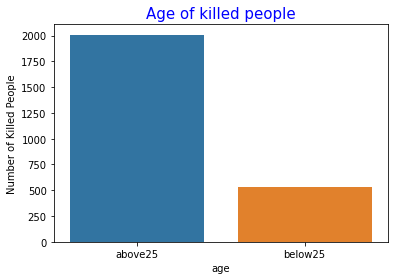

In [ ]:
sns.countplot(x=df.age)
plt.ylabel('Number of Killed People')
plt.title('Age of killed people',color = 'blue',fontsize=15)

# **Race of killed people**

Text(0.5, 1.0, 'Race of killed people')

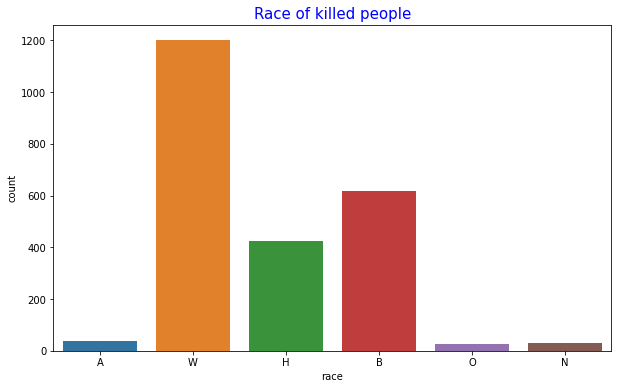

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(data=kill, x='race')
plt.title('Race of killed people',color = 'blue',fontsize=15)

# **Most dangerous states**

In [ ]:
kill.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False


In [ ]:
state = kill.state.value_counts()
state

CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
IL     62
WA     62
TN     59
LA     57
PA     51
NM     51
AL     50
VA     47
NY     45
SC     44
IN     43
WI     43
KY     43
NV     42
OR     38
MD     38
MI     37
NJ     35
MN     32
WV     27
AR     26
KS     24
MS     23
UT     23
MA     22
ID     17
AK     15
NE     15
ME     13
IA     12
MT     11
HI     11
DC     11
SD     10
CT      9
DE      8
WY      8
NH      7
ND      4
VT      3
RI      2
Name: state, dtype: int64

Text(0.5, 1.0, 'Most dangerous state')

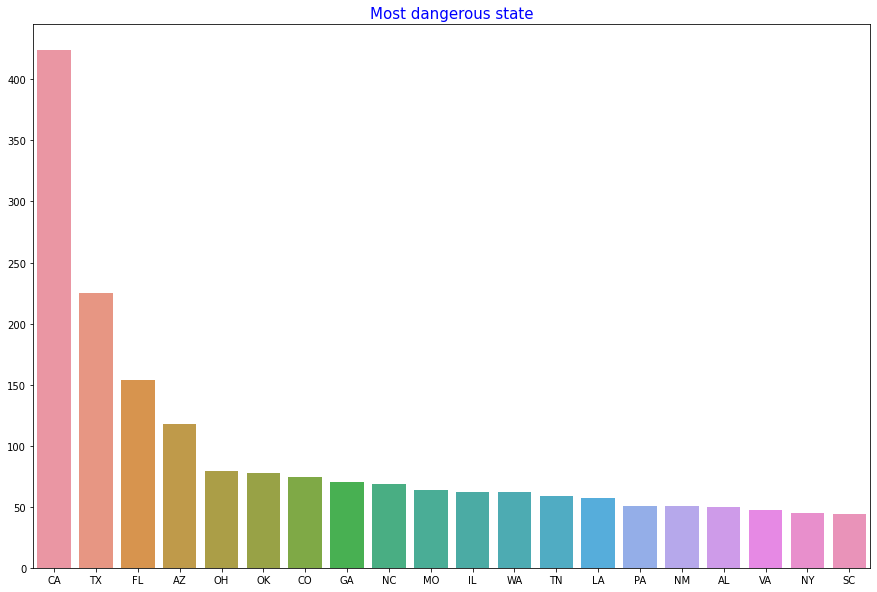

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=state[:20].index,y=state[:20].values)
plt.title('Most dangerous state',color = 'blue',fontsize=15)

# **Having mental ilness or not for killed people**

In [ ]:
kill.sample(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
1001,1148,Stephen Bukwich,05/01/16,shot,gun,52.0,M,W,Redding,CA,True,other,Not fleeing,False
1337,1529,Derek J. Sam,07/05/16,shot and Tasered,knife,29.0,M,O,Presque Isle,ME,False,other,Not fleeing,False
1098,1255,Vincent Nageak,10/02/16,shot,gun,36.0,M,N,Barrow,AK,False,attack,Not fleeing,False


Text(0.5, 1.0, 'Having mental illness or not')

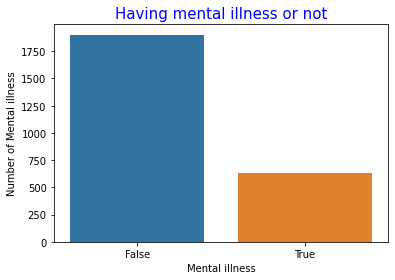

In [ ]:
sns.countplot(kill.signs_of_mental_illness)
plt.xlabel('Mental illness')
plt.ylabel('Number of Mental illness')
plt.title('Having mental illness or not',color = 'blue', fontsize = 15)

# **Threat types**

In [ ]:
kill.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False


Text(0.5, 1.0, 'Threat types')

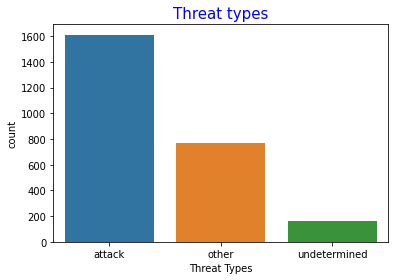

In [ ]:
sns.countplot(kill.threat_level)
plt.xlabel('Threat Types')
plt.title('Threat types',color = 'blue', fontsize = 15)

# **Flee types**

In [ ]:
kill.sample(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2326,2584,TK TK,15/05/17,shot,undetermined,NaN,M,NaN,Long Beach,CA,False,attack,Other,False
1724,1924,Donte T. Jones,02/10/16,shot,unknown weapon,36.0,M,B,Markham,IL,False,other,Not fleeing,False
1849,2063,Jacob C. Stevens,20/11/16,shot,gun,18.0,M,W,Kansas City,MO,False,other,Foot,False


Text(0.5, 1.0, 'Flee types')

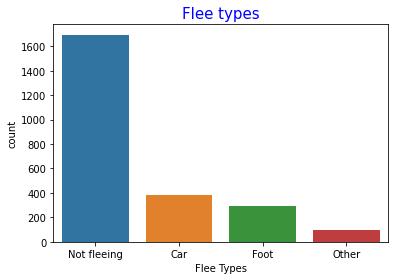

In [ ]:
sns.countplot(kill.flee)
plt.xlabel('Flee Types')
plt.title('Flee types',color = 'blue', fontsize = 15)

# **Having body cameras or not for police**

In [ ]:
kill.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False


Text(0.5, 1.0, 'Having body cameras or not on Police')

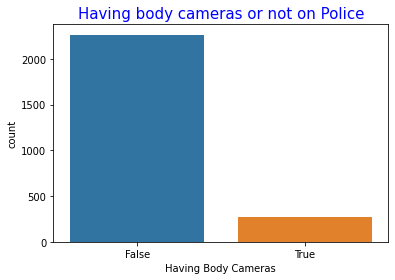

In [ ]:
sns.countplot(kill.body_camera)
plt.xlabel('Having Body Cameras')
plt.title('Having body cameras or not on Police',color = 'blue',fontsize = 15)

# **Kill numbers from states in kill data**

In [ ]:
kill.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False


In [ ]:
sta = kill.state.value_counts().index[:10]
sta

Index(['CA', 'TX', 'FL', 'AZ', 'OH', 'OK', 'CO', 'GA', 'NC', 'MO'], dtype='object')

Text(0.5, 1.0, 'Kill Numbers from States')

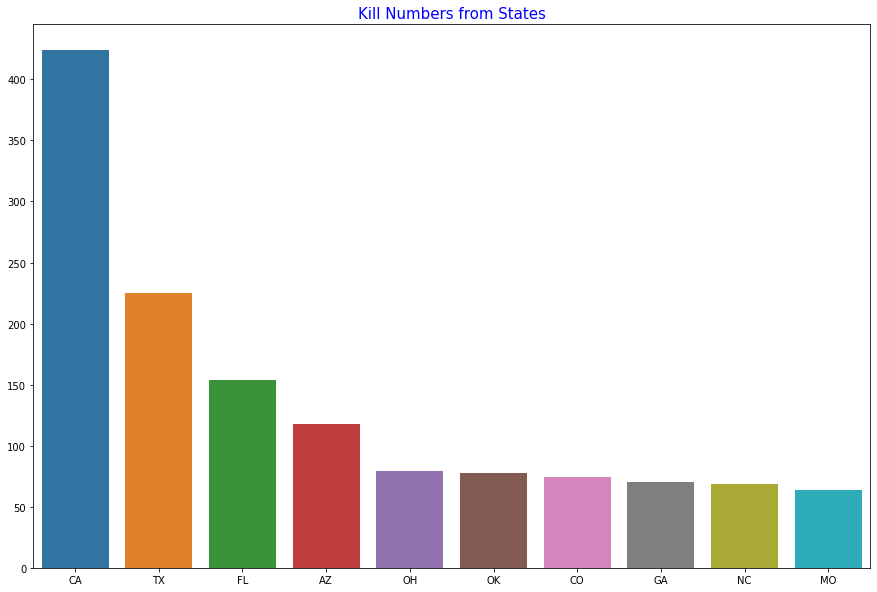

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=sta,y = kill.state.value_counts().values[:10])
plt.title('Kill Numbers from States',color = 'blue',fontsize=15)

# CONCLUSION
